In [1]:
import os
import cv2
import pathlib
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_resnet_v2 import *
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from keras.preprocessing.image import load_img
from skimage import measure
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
DIRECTORY = '/Users/antara/Desktop/chest_xray/'
FOLDERS = ['test', 'train', 'val']

CLASS = ['NORMAL','PNEUMONIA']

In [3]:
test_data = []
train_data = []
val_data = []

for folder in FOLDERS:
    folder_path = os.path.join(DIRECTORY, folder)
    for classification in CLASS:
        image_path = os.path.join(folder_path, classification)
        for image in os.listdir(image_path):
            try:
                image_url = os.path.join(image_path,image)
                arr = cv2.imread(image_url)
                arr = cv2.resize(arr, (100, 100))
                label = CLASS.index(classification)
                if folder == 'train':
                    train_data.append([arr, label])
                elif folder == 'test':
                    test_data.append([arr, label])
                else:
                    val_data.append([arr, label])
            except Exception as e:
                print(e)

In [4]:
import random

random.shuffle(train_data)

In [5]:
X = []
y = []

for feature, label in train_data:
    X.append(feature)
    y.append(label)

In [6]:
X = np.array(X)
y = np.array(y)

In [7]:
X = X.reshape(-1, 100, 100, 3)

In [8]:
X = X/255

In [10]:
X.shape[1:]

(100, 100, 3)

In [11]:
model = Sequential()

# Convolution and Max Pool layers
model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))

# Flatten
model.add(Flatten())

# Dense layers
model.add(Dense(256, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

# Output (O/P) layer
model.add(Dense(2, activation = 'sigmoid'))

# Compiling the model
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(X,y, epochs = 5, batch_size = 30, validation_split = 0.1)

Epoch 1/5
157/157 [==============================] - 149s 944ms/step - loss: 0.5698 - accuracy: 0.7482 - val_loss: 0.4904 - val_accuracy: 0.7969
Epoch 2/5
157/157 [==============================] - 148s 939ms/step - loss: 0.2148 - accuracy: 0.9150 - val_loss: 0.1523 - val_accuracy: 0.9559
Epoch 3/5
157/157 [==============================] - 146s 930ms/step - loss: 0.1450 - accuracy: 0.9418 - val_loss: 0.2306 - val_accuracy: 0.9157
Epoch 4/5
157/157 [==============================] - 150s 958ms/step - loss: 0.1350 - accuracy: 0.9508 - val_loss: 0.0912 - val_accuracy: 0.9693
Epoch 5/5
157/157 [==============================] - 185s 1s/step - loss: 0.0975 - accuracy: 0.9666 - val_loss: 0.1133 - val_accuracy: 0.9655


In [13]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [14]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

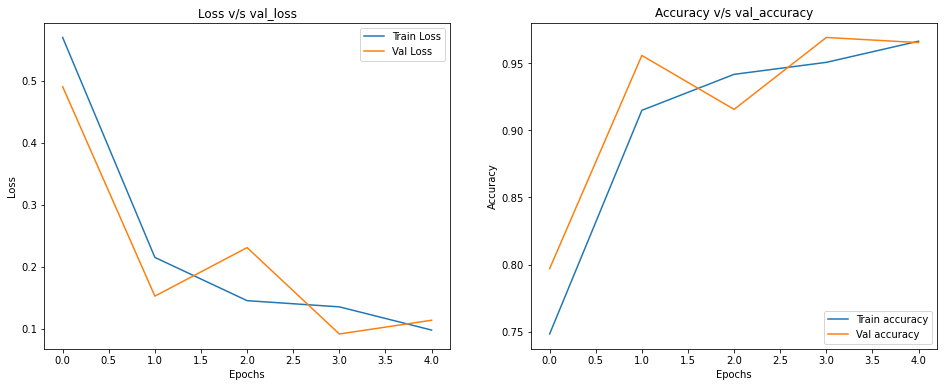

In [15]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

ax[0].set_title("Loss v/s val_loss")
ax[0].plot(history.history['loss'], label='Train Loss') 
ax[0].plot(history.history['val_loss'], label='Val Loss') 
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].set_title("Accuracy v/s val_accuracy")
ax[1].plot(history.history['accuracy'], label='Train accuracy') 
ax[1].plot(history.history['val_accuracy'], label='Val accuracy') 
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

In [16]:
X_test = []
y_test = []

for feature, label in test_data:
    X_test.append(feature)
    y_test.append(label)

In [17]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [18]:
X_test = X_test.reshape(-1, 100, 100, 3)

In [19]:
X_test = X_test/255

In [20]:
# pickle.dump(X_test, open('X_test.pkl', 'wb'))
# pickle.dump(y_test, open('y_test.pkl', 'wb'))

In [21]:
score = model.evaluate(X_test,y_test,verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.7514051795005798
Test accuracy: 0.7724359035491943


In [34]:
file_path = '/Users/antara/Desktop/chest_xray/train/NORMAL/IM-0654-0001.jpeg'

In [36]:
def read_file(filename):
  img = cv2.imread(filename)
  cv2.imshow("Image",img)

read_file(file_path)

In [37]:
img = cv2.imread(file_path)

In [38]:
img = np.array(img)

In [39]:
img = cv2.resize(img, (100, 100), 3)
img = np.expand_dims(img,axis=0)

In [40]:
img = img/255

In [41]:
model.predict(img)

array([[0.92855054, 0.20743239]], dtype=float32)

In [42]:
(model.predict(img))[0]

array([0.92855054, 0.20743239], dtype=float32)

In [49]:
print((model.predict(img))[0])
print(f"\n{CLASS[np.argmax((model.predict(img))[0])]}")
# (model.predict(img))[0]

[0.92855054 0.20743239]

NORMAL
